#### Domain: HR Analytics

#### Context:

McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The
company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources
is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the
cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition.
As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in
characteristics of employees who leave the organisation. Also, you have to use this information to predict if an employee is
at risk of attrition. This information will be used to target them with incentives.

#### DATA DESCRIPTION:

The data contains information on employees' demographic details, work-related metrics, and attrition flag

#### DATA DICTIONARY:
1. Unique Employee Identiier
2. Did the employee attrition happened or not?
3. Age of the employee
4. Travel commitments for the job
5. Data description not available**
6. Employee's Department
7. Distance from work to home (in KM)
8. Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
9. Field of Education
10. 1-Low, 2-Medium, 3-High, 4-Very High
11. Employee's gender
12. Data description not available
13. 1-Low, 2-Medium, 3-High, 4-Very High
14. Level of job (1 to 5)
15. Job Roles
16. 1-Low, 2-Medium, 3-High, 4-Very High
17. Marital Status
18. Monthly Salary
19. Data description not available
20. Number of companies worked at
21. Whether the employee is over 18 years of age?
22. Whether the employee is doing overtime?
23. The percentage increase in the salary last year
24. 1-Low, 2-Good, 3-Excellent, 4-Outstanding
25. 1-Low, 2-Medium, 3-High, 4-Very High
26. Standard Hours
27. Stock Option Level
28. Total years worked
29. Number of training attended last year
30. 1-Low, 2-Good, 3-Excellent, 4-Outstanding
31. Years at Company
32. Years in the current role
33. Years since the last promotion
34. Years with the current manager

In [23]:
#importing necessary libraries

import numpy as np   
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
#Loading the dataset
data = pd.read_excel('C:/Users/00005301/Downloads/HR_Employee_Attrition_Dataset.xlsx')

In [25]:
#Taking the copy of data
data_bkp = data.copy()

In [26]:
#Displaying first 5 rows
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [27]:
#Displaying the shape of the dataset
data.shape

(2940, 34)

There are 2940 rows and 34 columns

In [28]:
#Displaying the data types in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

#### Observations:

1. There are no null values in any columns.

#### There are few columns which do not add value to prediction model so we can drop them.

1. There are 3 columns for which data description is not available: DailyRate,HourlyRate,MonthlyRate. So these can be dropped.
2. Employee number doesn't add the value.
3. Employee gender can be dropped.

In [29]:
data = data.drop(['EmployeeNumber','DailyRate','HourlyRate','MonthlyRate','Gender'], axis = 1)

In [30]:
#Statistical Summary of the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
Education,2940.0,2.912925,1.023991,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.0,3.0,4.0,4.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.0,3.0,3.0,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,2940.0,2.728571,1.102658,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0


#### Observations:

Standard deviation of StandardHours is 0. Hence this column can be dropped.

In [16]:
#Checking the value counts for all the rows
for column in data.columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print()

Value counts for Attrition:
Attrition
No     2466
Yes     474
Name: count, dtype: int64

Value counts for Age:
Age
35    156
34    154
36    138
31    138
29    136
32    122
30    120
33    116
38    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
25     52
24     52
49     48
47     48
55     44
51     38
53     38
48     38
54     36
52     36
22     32
56     28
23     28
58     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    1922
Sales                      892
Human Resources            126
Name: count, dtype: int64

Value counts for DistanceFromHome:
DistanceFromHome
2     422
1     416
10    172
9     170
3     168
7     168
8  

##### Over18 and StandardHours fields is having same data in all the rows. Hence these will not add any value. These can be dropped.

In [31]:
data = data.drop(['StandardHours','Over18'], axis = 1) #dropping the columns

#### Univariate Analysis:

Attrition:

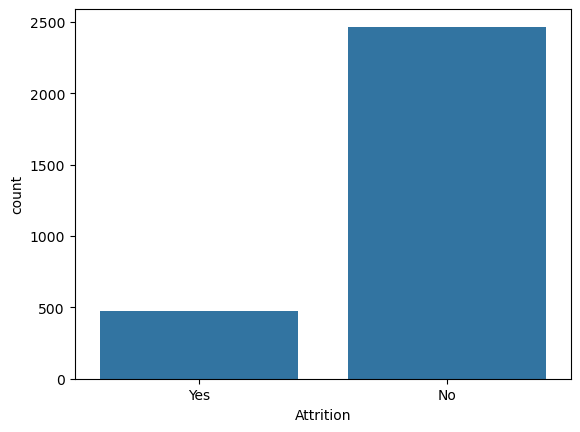

In [18]:
sns.countplot(data=data,x = 'Attrition')
plt.show()

The dataset is quite imbalanced. Both classes are not equal and this creates a sort of bias for the model.

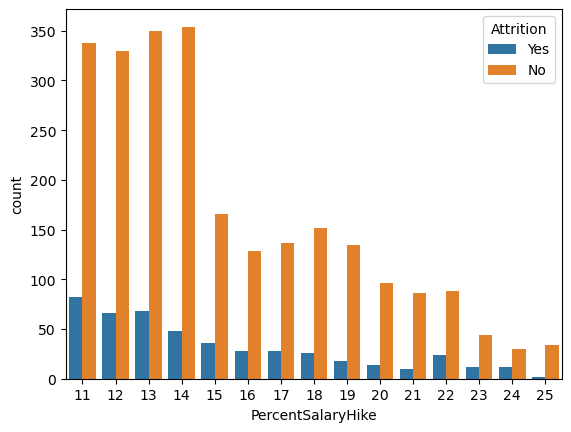

In [30]:
sns.countplot(hue ='Attrition', x ='PercentSalaryHike', data = data)
plt.show()

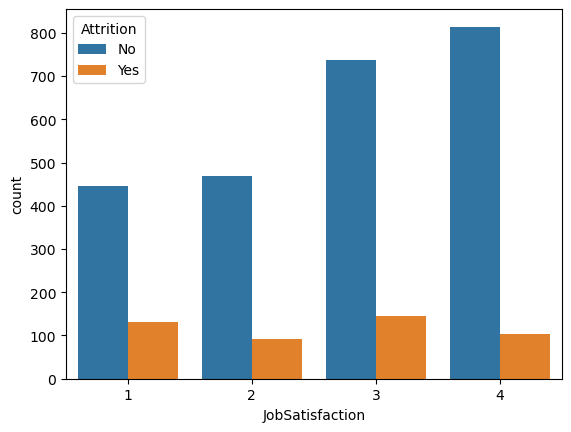

In [33]:
sns.countplot(hue ='Attrition', x ='JobSatisfaction', data = data)
plt.show()

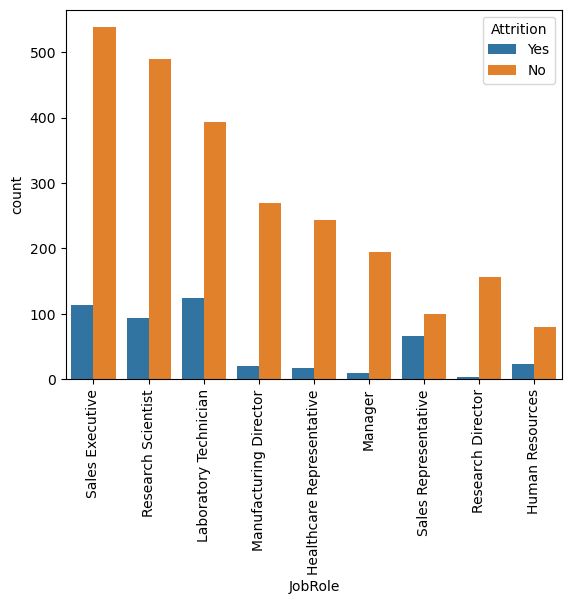

In [37]:
sns.countplot(hue ='Attrition', x ='JobRole', data = data)
plt.xticks(rotation=90)
plt.show()

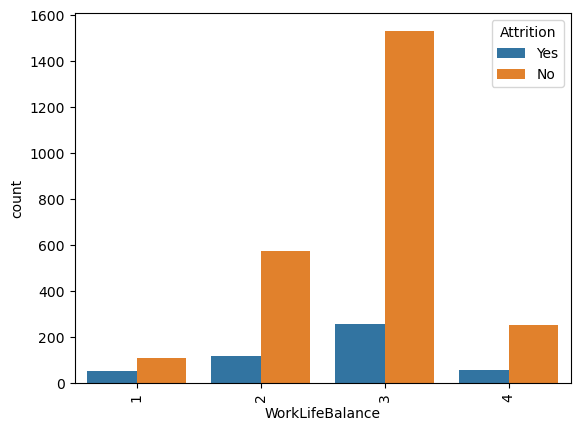

In [38]:
sns.countplot(hue ='Attrition', x ='WorkLifeBalance', data = data)
plt.xticks(rotation=90)
plt.show()

##### Not much of the conclusion can be made from Univariate analysis on the attrition. More insights can be drawn from the multivariate analysis

#### Multivariate Analysis:

C:\Users\00005301\AppData\Local\Temp\ipykernel_27060\4181845104.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='Attrition', y ='PercentSalaryHike', data = data, palette ='plasma')


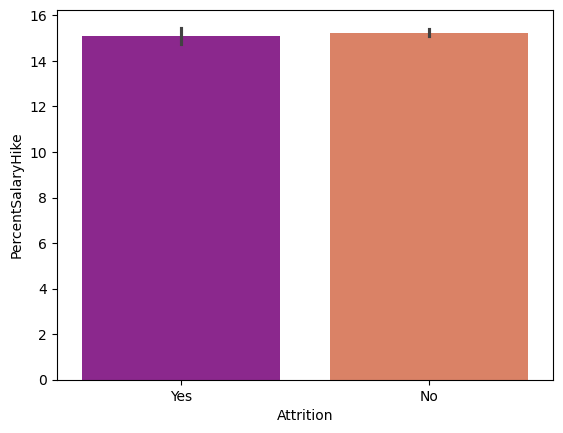

In [39]:
sns.barplot(x ='Attrition', y ='PercentSalaryHike', data = data, palette ='plasma')
plt.show()

This infers that employees having hike less than 15% leave the job, whereas, employees getting more than 15% don't leave the job.

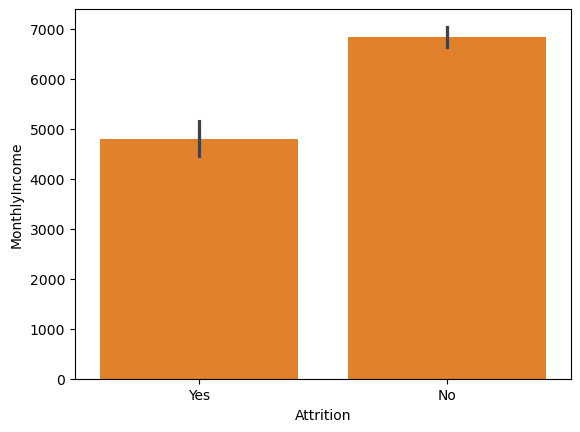

In [41]:
sns.barplot(x ='Attrition', y ='MonthlyIncome', data = data)
plt.show()

This shows that employee having Monthly income between 40000-5000USD would leave the job, and employee having monthly income between 6000-7000USD would not leave job.

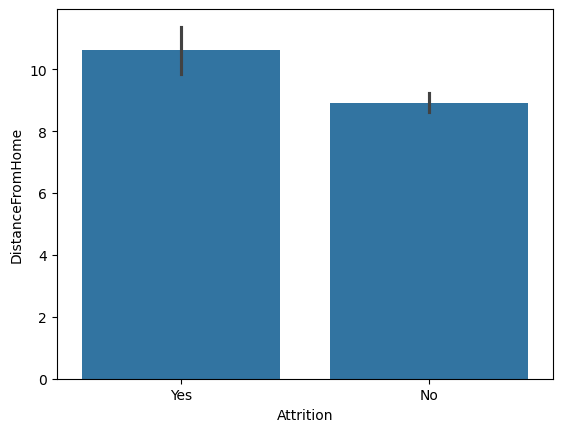

In [43]:
sns.barplot(x ='Attrition', y ='DistanceFromHome', data = data)
plt.show()

This shows that employee having distance from home >10km leaves the job and with <10km not leave the job.

##### Since the dataset is imbalanced, we will use resampling technique to handle this. Here we will be upsampling the dataset.

In [32]:
from sklearn.utils import resample #importing the package

#separating the yes and no attrition data
data_attrition_yes = data[data['Attrition']=='Yes']
data_attrition_no = data[data['Attrition']=='No']

#Upsampling the data_attrition_yes

data_attr_yes_upsampled = resample(data_attrition_yes,replace = True,n_samples = 2466)

In [33]:
new_data = pd.concat([data_attrition_no,data_attr_yes_upsampled]) #concating the upsampled data with the other class data

In [34]:
new_data['Attrition'].value_counts() #checking the value counts

Attrition
No     2466
Yes    2466
Name: count, dtype: int64

In [35]:
from sklearn.utils import shuffle
new_data=shuffle(new_data) #making sure that the data is not in particular order

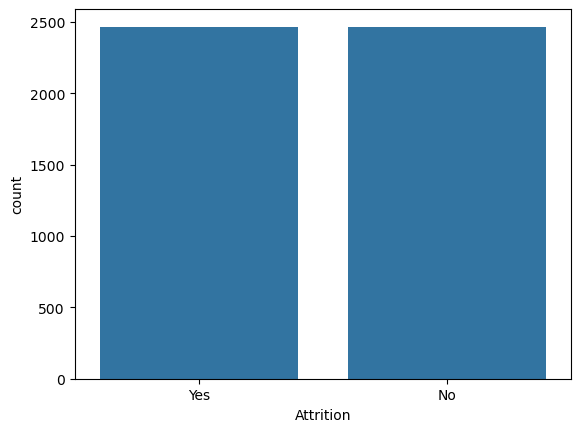

In [36]:
sns.countplot(data=new_data,x=new_data['Attrition'])
plt.show()

##### Now the dataset is balanced

#### Data Preparation:

In [95]:
#converting yes/no values in attrition field to 1 or 0

new_data['Attrition']=new_data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [98]:
#Converting categorical columns into numeric columns via one hot encoding
new_data = pd.get_dummies(new_data)
new_data = new_data.astype(int)

In [99]:
new_data.head() #Displaying first 5 rows

,Attrition,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
831,1,31,15,3,3,3,1,3,2610,1,...,0,0,0,0,0,0,1,0,1,0
2555,1,31,3,3,4,3,1,3,4084,1,...,0,0,1,0,0,0,0,1,1,0
1425,0,33,15,2,2,3,2,4,4878,0,...,0,0,0,0,0,0,1,0,0,1
2928,0,35,1,4,3,1,1,4,2977,1,...,0,0,1,0,0,0,1,0,1,0
513,1,20,10,1,4,3,1,3,1009,1,...,0,0,1,0,0,0,0,1,0,1


In [100]:
#Defining dependent and independent variables

X = new_data.drop(['Attrition'], axis=1)
y=new_data['Attrition']

##### Splitting data into test and train set

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#test and train sets are splitted as 30% test and 70 % training set 

#### Model Building

##### Logistic regression model

In [103]:
logit_data_model = LogisticRegression(solver="liblinear") #creating the model
logit_data_model.fit(X_train, y_train) #fitting the model

LogisticRegression(solver='liblinear')

In [107]:
y_predict = logit_data_model.predict(X_test) #predict on the test

In [119]:
coef_df = pd.DataFrame(logit_data_model.coef_)
coef_df['intercept'] = logit_data_model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.020243  0.03975  0.036255 -0.450391 -0.435093  0.216927 -0.431468   

          7         8         9  ...      37        38        39        40  \
0 -0.000031  0.180799 -0.057813  ... -1.3844  0.163533  0.262576  1.315512   

         41        42        43        44        45  intercept  
0  0.105397  0.381047  1.258678  0.033702  1.711421   1.745123  

[1 rows x 47 columns]


##### Model performance

1. Confusion matrix

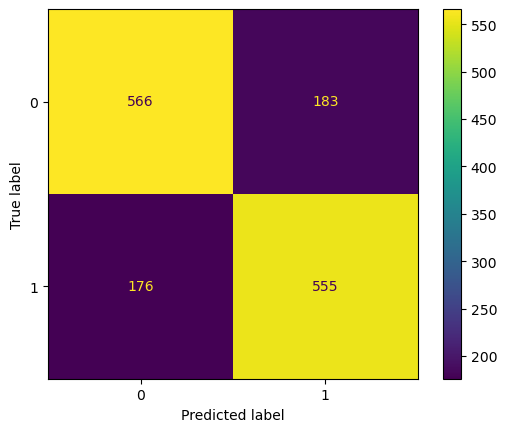

In [113]:
cm=metrics.confusion_matrix(y_test, y_predict)

display=metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

####
2. Classification report

In [115]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       749
           1       0.75      0.76      0.76       731

    accuracy                           0.76      1480
   macro avg       0.76      0.76      0.76      1480
weighted avg       0.76      0.76      0.76      1480



##### 
3. Model score

In [118]:
logit_data_model_score = logit_data_model.score(X_test, y_test)
print(logit_data_model_score*100, '%')

75.74324324324324 %


##### KNN model

###### Model Building

In [120]:
knn_data_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [121]:
knn_data_model.fit(X_train, y_train) #Calling KNN algorithm

KNeighborsClassifier(weights='distance')

##### Model performance

In [122]:
y_pred_knn = knn_data_model.predict(X_test) #Predicting the value

In [125]:
knn_data_model_score = knn_data_model.score(X_test, y_test) #Evaluating model score
print('Score of the model is', knn_data_model_score*100, '%')

Score of the model is 94.86486486486486 %


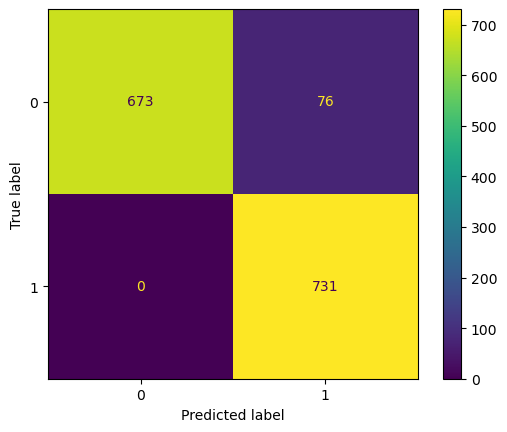

In [126]:
cm=metrics.confusion_matrix(y_test, y_pred_knn) #Confusion matrix building

display=metrics.ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [127]:
#Classification report

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       749
           1       0.91      1.00      0.95       731

    accuracy                           0.95      1480
   macro avg       0.95      0.95      0.95      1480
weighted avg       0.95      0.95      0.95      1480



#### Observations and business recommendations:

1. Taking the performance metrics into account, KNN performs better than logistic regression model.
2. McCurr can plan for few incentives for the employees, where distance from their home is bit higher(In this case more than 10km).
3. Also, hikes may also cause employee attrition. Standardization of hike percent for the rating for a given job role may help in reducing the attrition rate.

In [22]:
importances_rft = knn_data_model.feature_importances_ #feature importance of random forest
indices_rft = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'knn_data_model' is not defined